# Evaluating Word Embeddings

In this lab, you will learn how to evaluate word embeddings u


### Step 1: Load the WordSim-353 Dataset

The **WordSim-353** dataset is a widely used resource in Natural Language Processing (NLP) for evaluating the similarity and relatedness of word pairs. It consists of 353 word pairs, each annotated with human ratings that reflect how similar or related the two words are. These annotations are on a scale from 0 to 10, where higher scores indicate greater similarity or relatedness.

The dataset can be used in tasks such as:

- Evaluating word embeddings
- Measuring semantic similarity
- Benchmarking similarity metrics


### Citation
If you use the WordSim-353 dataset in your work, make sure to cite the original paper:

> Finkelstein, L., Gabrilovich, E., Matias, Y., Rivlin, E., Solan, Z., Wolfman, G., & Ruppin, E. (2002). Placing search in context: The concept revisited. *ACM Transactions on Information Systems (TOIS)*, 20(1), 116–131.

In [10]:
import csv

triplets=[]
with open('wordsim353.tsv') as f:
  lines=csv.reader(f)
  for line in lines:
    row_text=line[0].split('\t')
    if len(row_text)==3:
      w1,w2,sim=row_text
      triplets.append([w1,w2,float(sim)])


### Step 2: Load Pre-trained Word Embeddings


The `gensim.downloader` module provides an easy interface to download pre-trained word embeddings, NLP models, and datasets hosted by the Gensim library. By importing it as `api`, you can conveniently load resources without manually handling file downloads and setup.

#### Key Features:
1. **Access Pre-trained Models**: Load popular pre-trained word embedding models like `word2vec-google-news-300`, `glove-wiki-gigaword`, and `fasttext`.
2. **Built-in Datasets**: Access textual datasets for training or experimentation.
3. **Seamless Integration**: Automatically downloads, unpacks, and makes resources ready for use with Gensim.

#### Example Usage:

```python
import gensim.downloader as api

# List all available models and datasets
print(api.info()['models'].keys())

# Load a pre-trained model, e.g., Word2Vec Google News embeddings
model = api.load("glove-wiki-gigaword-200")

# Use the model for NLP tasks
vector = model['king']  # Example: Get the vector for the word 'king'
similar_words = model.most_similar('king')  # Find similar words


In [1]:
import gensim.downloader as api

# List all available models and datasets
print(api.info()['models'].keys())

dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])


In [2]:
# Load a pre-trained model, e.g., Word2Vec Google News embeddings
model = api.load("glove-wiki-gigaword-200")


[==================================================] 100.0% 252.1/252.1MB downloaded


In [3]:
# Use the model for NLP tasks
vector = model['king']  # Example: Get the vector for the word 'king'

In [4]:
print(vector.shape)

(200,)


### Step 3: Calculate Similarities
Given two vectors $ \mathbf{A} $ and $ \mathbf{B} $, the cosine similarity is calculated as:

$$
\text{cosine_similarity}(\mathbf{A}, \mathbf{B}) = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|}
$$

Where:
- $ \mathbf{A} \cdot \mathbf{B} $ is the dot product of the vectors $ \mathbf{A} $ and $ \mathbf{B} $,
- $ \|\mathbf{A}\| $ is the magnitude (or Euclidean norm) of vector $ \mathbf{A} $, calculated as $ \|\mathbf{A}\| = \sqrt{\sum_{i} A_i^2} $,
- $ \|\mathbf{B}\| $ is the magnitude (or Euclidean norm) of vector $ \mathbf{B} $, calculated similarly.




In [33]:
from tqdm import tqdm
import numpy as np
def cosine_similarity(a,b):
  a_norm = np.linalg.norm(a )
  b_norm = np.linalg.norm(b)
  return (a @ b) / (a_norm * b_norm)

In [34]:
gt, predictions=[],[]
for (w1,w2,sim) in tqdm(triplets):
  if (w1.lower() in model) and (w2.lower() in model):
        similarity = cosine_similarity(model[w1.lower()].reshape(-1),model[w2.lower()].reshape(-1))
        predictions.append(similarity)
        gt.append(sim)
  else:
    print('Not in Vocabulary :',w1,w2)

100%|██████████| 353/353 [00:00<00:00, 29492.05it/s]


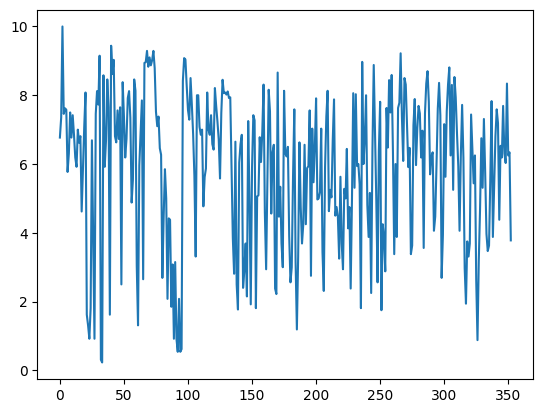

In [35]:
import matplotlib.pyplot as plt
plt.plot(gt)

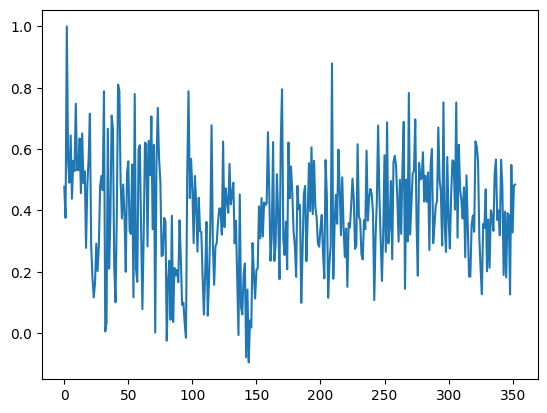

In [36]:
plt.plot(predictions)

### Step 4: Evaluate Using Pearson Correlation Coefficient

The Pearson correlation coefficient measures the linear relationship between two variables. It ranges from -1 to 1:
- **1** indicates a perfect positive linear relationship.
- **-1** indicates a perfect negative linear relationship.
- **0** means no linear relationship.

#### Mathematical Formula

The Pearson correlation coefficient, $r$, is calculated as:

$$
r = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}}
$$

Where:
- $x_i$ and $y_i$ are the individual data points for variables $x$ and $y$.
- $\bar{x}$ and $\bar{y}$ are the means of $x$ and $y$, respectively.
- $n$ is the number of data points.

In the context of the script, it compares calculated similarities from embeddings with human-annotated similarities to evaluate the embeddings' quality.

In [38]:
gt, predictions=np.array(gt),np.array(predictions)

In [39]:
def Pearson_Correlation(x,y):
  diff_x=(x-np.mean(x))
  diff_y=(y-np.mean(y))
  tmp=np.sqrt(np.sum(diff_x**2))*np.sqrt(np.sum(diff_y**2))
  return np.sum(diff_x*diff_y)/tmp

In [40]:
Pearson_Correlation(gt, predictions)

0.5777980611402451

### Step 5: Interpret Results

A higher Spearman correlation indicates that the word embeddings better capture the semantic relationships as perceived by humans. Typical results for good embeddings range from 0.6 to 0.8, depending on the dataset and model.

```python
wv_glove_200.evaluate_word_pairs(datapath('wordsim353.tsv'))
```

In [41]:
model.evaluate_word_pairs('wordsim353.tsv')

(PearsonRResult(statistic=0.5777980401977764, pvalue=7.972703615243916e-33),
 SignificanceResult(statistic=0.5775613720052261, pvalue=8.571561605709587e-33),
 0.0)

### Part 2: Evaluating GloVe with Analogies

Word embeddings are often evaluated using analogy tasks. In these tasks, we assess whether embeddings can correctly complete analogies such as "man : king :: woman : ?" (answer: "queen").

### Step 1: Load the Analogy Dataset

Analogies are often organized in text files with four words per line: word1, word2, word3, and word4.
The goal is to predict word4, given word1, word2, and word3.

In [ ]:
#### Code
analogy_data_url = "https://raw.githubusercontent.com/nicholas-leonard/word2vec/master/questions-words.txt"


In [44]:
!wget https://raw.githubusercontent.com/nicholas-leonard/word2vec/master/questions-words.txt

--2025-01-22 17:22:17--  https://raw.githubusercontent.com/nicholas-leonard/word2vec/master/questions-words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.04s   

2025-01-22 17:22:18 (14.4 MB/s) - ‘questions-words.txt’ saved [603955/603955]



### Step 3: Solve Analogies Using GloVe

To solve analogies, we use the vector arithmetic property of embeddings:
$$vec(word2) - vec(word1) + vec(word3) ≈ vec(word4)$$

In [49]:
#"man : king :: woman : ?" (answer: "queen").
model.most_similar(model['king']+model['women'] -model['man'])

[('women', 0.6493772864341736),
 ('king', 0.6316549777984619),
 ('queen', 0.5579749941825867),
 ('crown', 0.47750821709632874),
 ('monarch', 0.4591723084449768),
 ('throne', 0.4543609619140625),
 ('royal', 0.45272693037986755),
 ('kingdom', 0.44744616746902466),
 ('ii', 0.4302074909210205),
 ('men', 0.41720065474510193)]

In [51]:
model.most_similar(positive=['women', 'king'], negative=['man'], topn=2)

[('queen', 0.5299373865127563), ('crown', 0.44902968406677246)]

In [46]:
model.most_similar(positive=['france', 'berlin'], negative=['paris'])

[('germany', 0.8352416753768921),
 ('german', 0.6844801902770996),
 ('austria', 0.6128034591674805),
 ('poland', 0.5813313722610474),
 ('germans', 0.574868381023407),
 ('munich', 0.5435905456542969),
 ('belgium', 0.5324130058288574),
 ('britain', 0.5295413732528687),
 ('europe', 0.5244017839431763),
 ('czech', 0.5152410864830017)]

### Step 3: Interpret Results

The analogy accuracy gives us insight into how well the embeddings capture relational semantics. Common analogies include relationships like gender (man:king::woman:queen) and geography (Paris:France::Berlin:Germany).

```python
from gensim.test.utils import datapath
wv_glove_200.evaluate_word_analogies(datapath('questions-words.txt'))
```

In [ ]:
from gensim.test.utils import datapath
model.evaluate_word_analogies('questions-words.txt')